## План
### [Загрузка данных](#cell1)
   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<a id="cell1"></a>
#### Загрузка данных

In [3]:
df_train = pd.read_csv('train.csv', delimiter =',')
df_train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80000 non-null  int64  
 1   Product_ID                  80000 non-null  object 
 2   Gender                      80000 non-null  object 
 3   Age                         80000 non-null  object 
 4   Occupation                  80000 non-null  int64  
 5   City_Category               80000 non-null  object 
 6   Stay_In_Current_City_Years  80000 non-null  object 
 7   Marital_Status              80000 non-null  int64  
 8   Product_Category_1          80000 non-null  int64  
 9   Product_Category_2          54892 non-null  float64
 10  Product_Category_3          24331 non-null  float64
 11  Purchase                    80000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


#### Описание DataFrame

User_ID: Уникальный идентификатор покупателя.
Product_ID: Уникальный идентификатор продукта. 
Gender: Пол покупателя.
Age: Возраст покупателя, разделенного на бункеры.
Occupation: Занятость покупателя. 
City_Category: Место жительства покупателя.
Stay_In_Current_City_Years: Количество лет пребывания в текущем городе.
Marital_Status: Семейное положение покупателя.
Product_Category_1: Категория продукта покупки.
Product_Category_2: Продукт может принадлежать к другой категории.
Product_Category_3: Продукт может принадлежать к другой категории.
Purchase: Сумма покупки в долларах

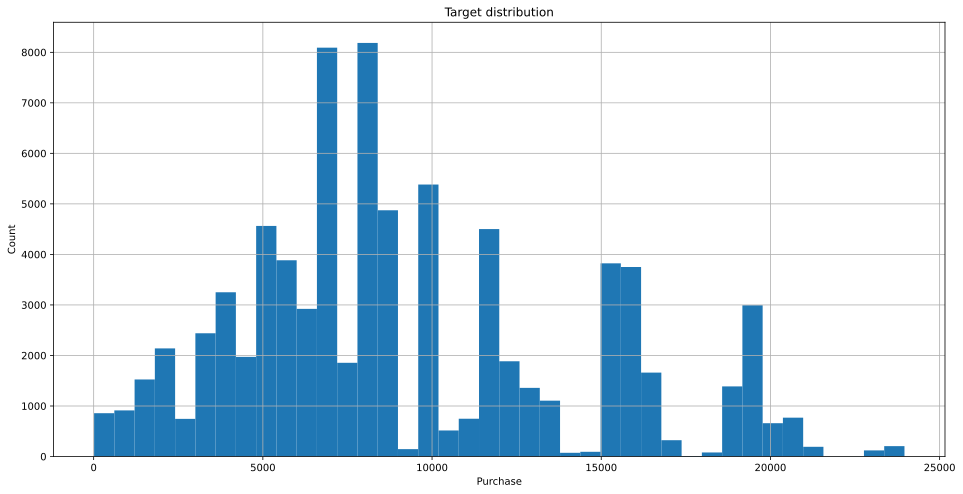

In [5]:
plt.figure(figsize = (16, 8))

df_train['Purchase'].hist(bins=40)
plt.ylabel('Count')
plt.xlabel('Purchase')

plt.title('Target distribution')
plt.show()

In [6]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.000000e+04,80000.000000,80000.000000,80000.000000,54892.000000,24331.000000,80000.000000
mean,1.003023e+06,8.086863,0.409388,5.388463,9.851873,12.676421,9243.933162
std,1.728959e+03,6.536459,0.491724,3.922793,5.079163,4.109343,5021.298356
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001503e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5679.750000
50%,1.003067e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8039.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12046.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Проверим признаки на уникальность

In [7]:
print(df_train.nunique())

User_ID                        5763
Product_ID                     3256
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      13314
dtype: int64


#### Исследуем признаки на процент не заполненных значений

In [8]:
print(df_train.isnull().sum() / df_train.shape[0] * 100)

User_ID                        0.00000
Product_ID                     0.00000
Gender                         0.00000
Age                            0.00000
Occupation                     0.00000
City_Category                  0.00000
Stay_In_Current_City_Years     0.00000
Marital_Status                 0.00000
Product_Category_1             0.00000
Product_Category_2            31.38500
Product_Category_3            69.58625
Purchase                       0.00000
dtype: float64


#### Обрабатываем категориальные признаки, избавляемся от NaN, преобразуем Id продукции в int

In [10]:
df_train = pd.get_dummies(df_train,columns=["Gender","Age","City_Category","Stay_In_Current_City_Years"])
df_train.Product_ID = df_train.Product_ID.str.replace("P00", "")
df_train.Product_ID = df_train.Product_ID.astype(int)
df_train = df_train.fillna(0)
df_train.head(5)

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1004085,75742,6,0,8,14.0,0.0,7803,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1005491,234842,7,0,5,6.0,16.0,6903,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1003499,220142,3,0,1,15.0,0.0,15773,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1000097,211242,3,0,8,12.0,0.0,8116,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1005802,327142,0,0,8,15.0,0.0,6144,1,0,...,0,0,1,0,0,0,0,0,0,1


#### Построим корриляционную матрицу

<AxesSubplot:>

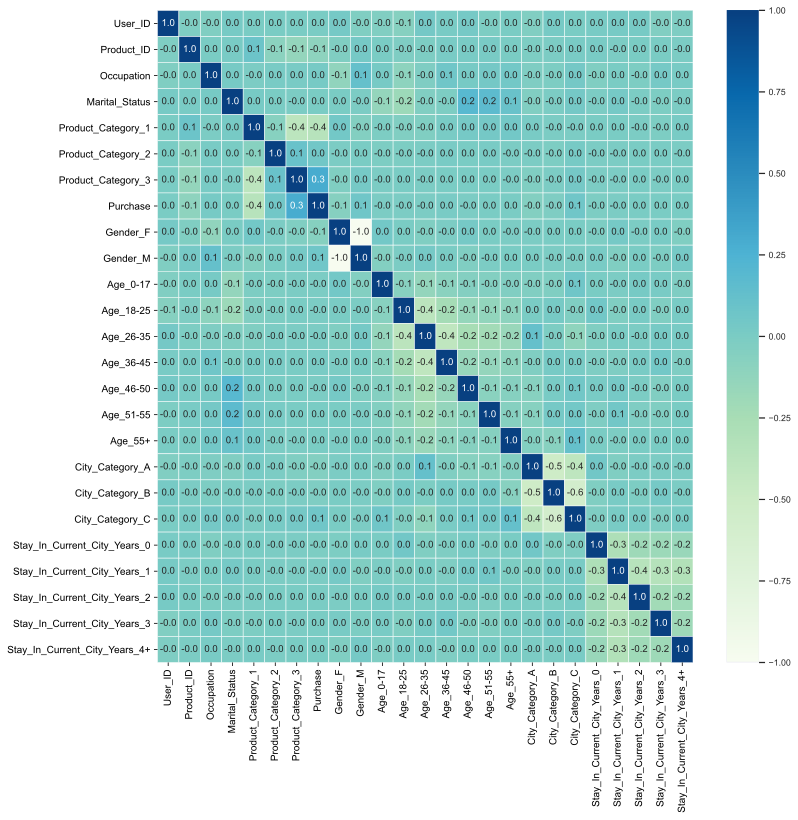

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize =(12, 12))
sns.set(font_scale=0.8)
sns.heatmap(corrmat, ax = ax, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')

#### Разбиение на train и test

In [12]:
X = pd.DataFrame(df_train)
y = pd.DataFrame(X, columns=['Purchase'])
X.drop(['Purchase'], axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

##### Создание модели

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
model1 = GradientBoostingRegressor(n_estimators=442, max_depth=5, min_samples_split=2,
                                           learning_rate=0.1, loss='ls', random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=1442, max_depth=18, random_state=42, max_features=7)

In [16]:
from sklearn.ensemble import VotingRegressor
model = VotingRegressor([('model1', model1), ('model2', model2)])

#### Обучение модели

In [17]:
model.fit(X_train, y_train)

VotingRegressor(estimators=[('model1',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=442,
                                                       random_state=42)),
                            ('model2',
                             RandomForestRegressor(max_depth=18, max_features=7,
                                                   n_estimators=1442,
                                                   random_state=42))])

#### Предсказание на тестовой выборке и оценка

In [18]:
y_pred = model.predict(X_valid)
y_pred.shape

(32000,)

In [20]:
check_test = pd.DataFrame({ 
    "y_test": y_valid["Purchase"],
    "y_pred": y_pred.flatten(),
    "error": abs(100 - (y_pred.flatten() *100 / y_valid["Purchase"]))
})

check_test.head(5)

,y_test,y_pred,error
47044,13033,9577.135878,26.516260
44295,8772,6174.334330,29.613152
74783,12001,10989.944727,8.424759
70975,6877,6980.282251,1.501850
46645,13037,11405.039745,12.517913


In [21]:
from sklearn.metrics import r2_score
r2_score(check_test["y_test"], check_test["y_pred"])

0.7020770293412639

#### Кросс-вылидация

In [22]:
from sklearn.model_selection import cross_val_score, KFold
cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([0.69702334, 0.68667111, 0.68489107])

In [23]:
cv_score.mean()

0.6895285064761487

#### Проверка модели на тестовом файле

In [24]:
df_test = pd.read_csv('test.csv', delimiter =',')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     20000 non-null  int64  
 1   Product_ID                  20000 non-null  object 
 2   Gender                      20000 non-null  object 
 3   Age                         20000 non-null  object 
 4   Occupation                  20000 non-null  int64  
 5   City_Category               20000 non-null  object 
 6   Stay_In_Current_City_Years  20000 non-null  object 
 7   Marital_Status              20000 non-null  int64  
 8   Product_Category_1          20000 non-null  int64  
 9   Product_Category_2          13598 non-null  float64
 10  Product_Category_3          6064 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.7+ MB


In [25]:
X_test = pd.get_dummies(df_test,columns=["Gender","Age","City_Category","Stay_In_Current_City_Years"])
X_test.Product_ID = X_test.Product_ID.str.replace("P00", "")
X_test.Product_ID = X_test.Product_ID.astype(int)
X_test = X_test.fillna(0)
X_test.head(30)

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1002118,108542,14,1,5,8.0,14.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1002476,86442,12,1,8,13.0,15.0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,1005220,248442,7,0,3,4.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1005213,270242,0,0,8,0.0,0.0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1002374,106042,14,0,5,0.0,0.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5,1002820,182242,0,0,1,5.0,6.0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,1000767,370293,12,0,19,0.0,0.0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
7,1000556,88342,9,0,8,14.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,1003878,249542,16,0,1,5.0,15.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9,1005771,10942,7,0,1,2.0,6.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [26]:
predictions = model.predict(X_test)
df_test["Purchase"] = predictions

In [27]:
submit = pd.read_csv('sample_submission.csv', delimiter =',')
submit.head()

,Id,Purchase
0,0,9000
1,1,9000
2,2,9000
3,3,9000
4,4,9000


In [28]:
submit['Purchase'] = predictions
submit.head()

,Id,Purchase
0,0,6873.748223
1,1,8303.285094
2,2,10114.947030
3,3,7650.956178
4,4,6818.169901


#### Выгрузка файла с предсказаниями

In [29]:
submit.to_csv('IShmanov_predictions.csv', index=False)

https://www.kaggle.com/igorshmanov